# **Employee Attrition ✨**
#Margo Tiamanova
#Florencia Ogorinsky
***RETENTION SPECIALISTS***

$\quad \LARGE \text{}$

$\quad \LARGE \text{Employee attrition is crucial for any organization as it directly affects costs, productivity, and company reputation.}\\[1cm]$
$\quad \LARGE \text{High turnover leads to increased recruitment and training costs, disrupts team dynamics, and causes a loss of valuable knowledge.
It can also damage the company’s reputation, making it harder to attract top talent.}\\[1cm]$
$\quad \LARGE \text{Additionally, employees who are satisfied and stay longer tend to share positive experiences, boosting the company's image.
 Managing attrition is essential for operational efficiency and maintaining a strong employer brand.}$

# **Data pre-processing**

In [ ]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hakaton1/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.DataFrame(data)

In [ ]:
print(data.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
# missing value proportions by column
missing_ratios = data.isna().mean()
print(missing_ratios)

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [ ]:
#checking cells that have only 1 value (not useful for analysis)
print(data['EmployeeCount'].unique())
print(data['Over18'].unique())
print(data['StandardHours'].unique())



[1]
['Y']
[80]


In [ ]:
data=data.drop(['EmployeeCount','Over18','StandardHours'], axis=1, errors='ignore')


In [ ]:
#removing duplicate rows
data=data.drop_duplicates()
print(data.duplicated().sum())


0


In [ ]:
#No need to fix structural errors because we only have int and Categorical columns,
#we dont have columns like dates where we would need to fix


In [ ]:
#missing data:
missing_data=data.isnull().sum()
print(missing_data)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#Target= Attrition column
#features= all the other columns that we didnt delete from the data frame



In [ ]:
#taking out outliers from salary:

for column in ['MonthlyIncome']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in ['MonthlyRate']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]



In [ ]:
#checking how many values in each column I have after I delete the outliers:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1356 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1356 non-null   int64 
 1   Attrition                 1356 non-null   object
 2   BusinessTravel            1356 non-null   object
 3   DailyRate                 1356 non-null   int64 
 4   Department                1356 non-null   object
 5   DistanceFromHome          1356 non-null   int64 
 6   Education                 1356 non-null   int64 
 7   EducationField            1356 non-null   object
 8   EmployeeCount             1356 non-null   int64 
 9   EmployeeNumber            1356 non-null   int64 
 10  EnvironmentSatisfaction   1356 non-null   int64 
 11  Gender                    1356 non-null   object
 12  HourlyRate                1356 non-null   int64 
 13  JobInvolvement            1356 non-null   int64 
 14  JobLevel                  135

In [ ]:
#We still have many values so is good for analysis

# **Data distribuition**

In [ ]:
import scipy.stats as stats
numerical_data = data.select_dtypes(include=['int64'])
skewness = stats.skew(numerical_data)
kurtosis = stats.kurtosis(numerical_data)
print(kurtosis)
print(skewness)

[-0.11038112 -1.20040779 -0.29581853 -0.57564317         nan -1.23614266
 -1.20149558 -1.19297099  0.23014926 -0.19095729 -1.21635446  0.84220359
 -1.22329943  0.09070018 -0.3373908   1.64038893 -1.1894076          nan
  0.29329367  1.98740672  0.48509416  0.41296751  4.7182342   0.14166502
  4.28474152  0.30864744]
[ 0.52977568 -0.00261759  0.92313021 -0.29439168         nan  0.01135369
 -0.31289261 -0.03581652 -0.481505    0.73253215 -0.3366802   1.19306864
  0.01982674  1.06599517  0.79647057  1.90798033 -0.29445745         nan
  0.96373986  1.23985293  0.55441951 -0.56579553  1.70314839  0.83896515
  2.08230678  0.86905987]


<ipython-input-12-163963972403>:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(numerical_data)
<ipython-input-12-163963972403>:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = stats.kurtosis(numerical_data)


In [ ]:
'''
With the skewness bigger than 2 in column Years Since last promotion,
and the histogram we see below, we can realize that this column does not have a normal distribuition
'''

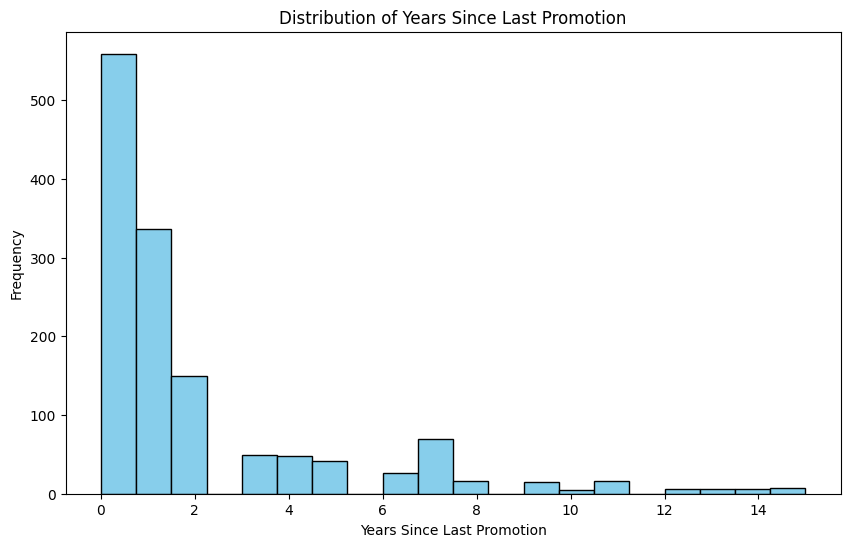

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['YearsSinceLastPromotion'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#kurtosis there are no values <>3 so I dont modify columns because of kurtosis
#skewness we have some big values like in YearsSinceLastPromotion (skewness of 2).
#I decided to transform it so will have more normal distribuition and check again:
skewness = stats.skew(data['YearsSinceLastPromotion'])
print(skewness)
data['YearsSinceLastPromotion'], _ = stats.boxcox(data['YearsSinceLastPromotion'] + 1)
skewness = stats.skew(data['YearsSinceLastPromotion'])
print(skewness)



2.0823067793233565
0.22567270711799142


#**Correlation and Trend Analysis**

In [ ]:
print(numerical_data)

      Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2         

$\quad \LARGE \text{Analyzing correlation between numerical columns and our target column(Attrition)}$

## Pearson:
1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship, and
0 indicates no linear relationship.
For the analysis we want to take variables from moderated correlation to strong (from 0.1 or -0.1 to 1 or -1) So we are not considering for analysis if coefficient is close to 0 in absolute value

In [ ]:
from scipy.stats import pearsonr
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
corr, _ = pearsonr(data['Age'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')


Pearson Correlation Coefficient: -0.14


In [ ]:
corr, _ = pearsonr(data['DailyRate'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.06


In [ ]:
corr, _ = pearsonr(data['DistanceFromHome'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: 0.08


In [ ]:
corr, _ = pearsonr(data['Education'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.03


In [ ]:
corr, _ = pearsonr(data['EmployeeNumber'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.01


In [ ]:
corr, _ = pearsonr(data['EnvironmentSatisfaction'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')


Pearson Correlation Coefficient: -0.10


In [ ]:
corr, _ = pearsonr(data['HourlyRate'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.01


In [ ]:
corr, _ = pearsonr(data['JobInvolvement'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.13


In [ ]:
corr, _ = pearsonr(data['JobLevel'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.15


In [ ]:
corr, _ = pearsonr(data['JobSatisfaction'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.11


In [ ]:
corr, _ = pearsonr(data['MonthlyIncome'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.14


In [ ]:
corr, _ = pearsonr(data['MonthlyRate'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: 0.01


In [ ]:
corr, _ = pearsonr(data['NumCompaniesWorked'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: 0.05


In [ ]:
corr, _ = pearsonr(data['PercentSalaryHike'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.01


In [ ]:
corr, _ = pearsonr(data['PerformanceRating'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: 0.01


In [ ]:
corr, _ = pearsonr(data['RelationshipSatisfaction'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.05


In [ ]:
corr, _ = pearsonr(data['StockOptionLevel'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.14


In [ ]:
corr, _ = pearsonr(data['TotalWorkingYears'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.15


In [ ]:
corr, _ = pearsonr(data['TrainingTimesLastYear'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.05


In [ ]:
corr, _ = pearsonr(data['WorkLifeBalance'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.07


In [ ]:
corr, _ = pearsonr(data['YearsAtCompany'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.14


In [ ]:
corr, _ = pearsonr(data['YearsInCurrentRole'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.17


In [ ]:
corr, _ = pearsonr(data['YearsSinceLastPromotion'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

#very small correlation. Not using it for analysis

Pearson Correlation Coefficient: -0.04


In [ ]:
corr, _ = pearsonr(data['YearsWithCurrManager'], data['Attrition'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.16


$\quad \LARGE \text{From the correlation analysis we can see there is non of these variables directly connected to Attrition, so we are going to split in subgroups and analyze again:}$

In [ ]:
import pandas as pd

#Subgroup 1:
married_females = data[(data['Gender'] == 'Female') & (data['MaritalStatus'] == 'Married')]
married_females = pd.get_dummies(married_females, drop_first=True)


#Subgroup 2:
single_males = data[(data['Gender'] == 'Male') & (data['MaritalStatus'] == 'Single')]
single_males = pd.get_dummies(single_males, drop_first=True)

correlation_married_females = married_females.corr()['Attrition'].sort_values(ascending=False)

correlation_single_males = single_males.corr()['Attrition'].sort_values(ascending=False)

print("Correlation married women:")
print(correlation_married_females)

print("\nCorrelation single men:")
print(correlation_single_males)


Correlation married women:
Attrition                            1.000000
OverTime_Yes                         0.170129
DistanceFromHome                     0.149220
JobRole_Human Resources              0.146622
JobRole_Laboratory Technician        0.054221
BusinessTravel_Travel_Rarely         0.042553
BusinessTravel_Travel_Frequently     0.036424
EducationField_Medical               0.033599
EducationField_Technical Degree      0.030475
WorkLifeBalance                      0.023625
EducationField_Life Sciences         0.010848
JobRole_Sales Executive              0.004672
YearsAtCompany                       0.004587
YearsSinceLastPromotion             -0.008149
PercentSalaryHike                   -0.011368
RelationshipSatisfaction            -0.011960
EmployeeNumber                      -0.024261
Department_Sales                    -0.024839
JobRole_Manufacturing Director      -0.027771
Department_Research & Development   -0.029159
PerformanceRating                   -0.030488
JobRole

##Conclusion based on the analysis


$\quad \LARGE \text{For the purpose of the analysis, we are considering the single men subgroup, because inside of it we can see more correlated variables with Attrition than in the subgroup of married women.}$

$\LARGE \text{So, we can see in single men that OverTime\_Yes has a bigger and positive correlation with Attrition, which means that they have a higher probability of Attrition (leaving the company) if they work more extra hours.}$

$\LARGE \text{Also, EducationField\_Technical — if they have an educational technical degree, they have a higher chance of rotating.}$

$\LARGE \text{People prefer to follow a working schedule and have their own activities after work, and if they have an educational background, they have more possibilities to choose a company that will offer them better benefits.}$

$\LARGE \text{As expected, the relationship between Attrition and Monthly\_Income is negative — as income increases, employees tend to stay longer in the company, meaning higher income leads to lower attrition.}$

$\LARGE \text{Job\_Satisfaction and Worklife\_Balance also show a negative correlation with Attrition, as we might expect. The better the work-life balance, the less frequently employees leave.}\\[1cm]$




$\quad \LARGE \text{In Israel, the shift toward remote or hybrid work models likely helps reduce attrition, as these arrangements offer greater work-life balance.}$

$\LARGE \text{Employees in Israel also often work under global hour contracts, meaning overtime is included in the regular salary until a certain threshold is reached.}$

$\LARGE \text{This system could impact attrition, as employees may not feel overworked as long as their total workload remains manageable.}$

$\LARGE \text{Moreover, while some companies offer benefits like meal apps (Cibus, Tenbis), gym passes, and yoga classes as alternatives to higher salaries, employees generally prioritize higher salaries over benefits.}$

$\LARGE \text{Thus, improving compensation might be a more effective strategy for reducing attrition than offering non-monetary perks.}$








# **Identifying trends**

## Window Functions:
They apply various calculations within a specific window of the data

<ipython-input-40-2391b772fd71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_men["Attrition"] = single_men["Attrition"].map({"Yes": 1, "No": 0})
<ipython-input-40-2391b772fd71>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_men["MonthlyIncome_Rolling"] = single_men["MonthlyIncome"].rolling(window=10).mean()
<ipython-input-40-2391b772fd71>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

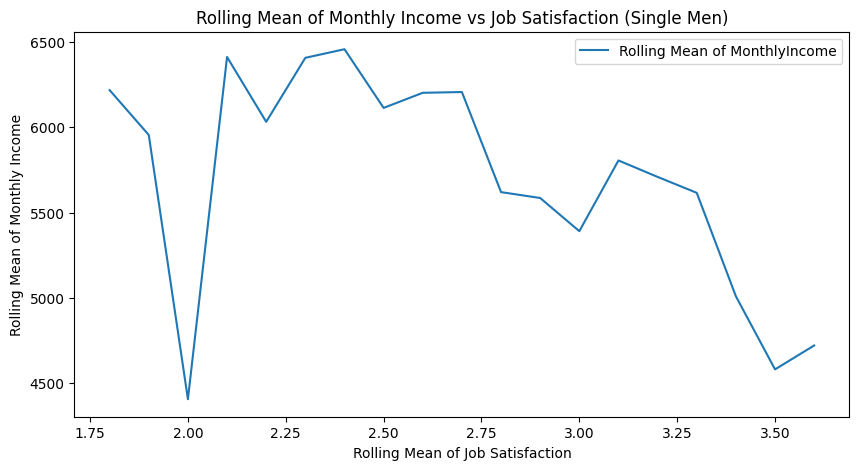

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

single_men = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Single')]

single_men["Attrition"] = single_men["Attrition"].map({"Yes": 1, "No": 0})

single_men["MonthlyIncome_Rolling"] = single_men["MonthlyIncome"].rolling(window=10).mean()
single_men["JobSatisfaction_Rolling"] = single_men["JobSatisfaction"].rolling(window=10).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=single_men, x='JobSatisfaction_Rolling', y='MonthlyIncome_Rolling', label='Rolling Mean of MonthlyIncome',ci=None)
plt.title("Rolling Mean of Monthly Income vs Job Satisfaction (Single Men)")
plt.xlabel("Rolling Mean of Job Satisfaction")
plt.ylabel("Rolling Mean of Monthly Income")
plt.legend()
plt.show()



$\quad \LARGE \text{We can conclude with this lineplot that there is no really relation between the income and Job satisfaction}$

$\quad \LARGE \text{Recognize employee compensation patterns.
Determine any trends or irregularities (such as abrupt pay raises or cutbacks).}$

#Trend Analysis:
$\quad \LARGE \text{Investigate trends in performance ratings across different job roles and departments.}$

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df[["Department"]]


,Department
0,Sales
1,Research & Development
2,Research & Development
3,Research & Development
4,Research & Development
...,...
1465,Research & Development
1466,Research & Development
1467,Research & Development
1468,Sales


In [ ]:
df[["JobRole"]]

,JobRole
0,Sales Executive
1,Research Scientist
2,Laboratory Technician
3,Research Scientist
4,Laboratory Technician
...,...
1465,Laboratory Technician
1466,Healthcare Representative
1467,Manufacturing Director
1468,Sales Executive


In [ ]:
df[["PerformanceRating"]]

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


###**Average Performance Ratings by Job Role and Department**

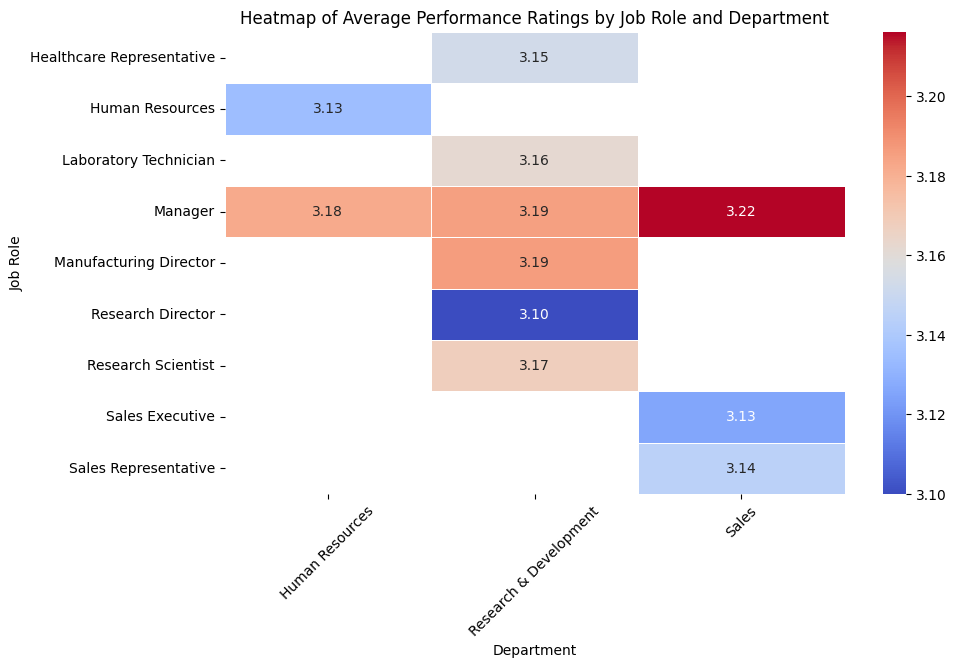

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap
pivot_table = df.pivot_table(values="PerformanceRating", index="JobRole", columns="Department", aggfunc="mean")


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title("Heatmap of Average Performance Ratings by Job Role and Department")
plt.xlabel("Department")
plt.ylabel("Job Role")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#Each cell in this table has a number, which tells us the average performance rating for that job role in that department.

$\quad \LARGE \text{Research directors have the lowest performance rating, while sales managers have the best. The majority of scores, which range from 3.10 to 3.22, are extremely close.}\\[1cm]$
$\quad \LARGE \text{Managers and directors of manufacturing receive higher evaluations than sales executives and human resources. Although there aren't many differences overall, sales managers are clearly the best.}$

$\quad \LARGE \text{Create cross-tabulations and heatmaps to visualize relationships between key variables, such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by Education and Attrition}$

###**Average distance home (job role and attrition)**

In [ ]:
'''
Do employees who work further away from home have a greater attrition rate?
Is distance a more significant factor in attrition for certain job roles?
'''

'\nDo employees who work further away from home have a greater attrition rate?\nIs distance a more significant factor in attrition for certain job roles?\n'

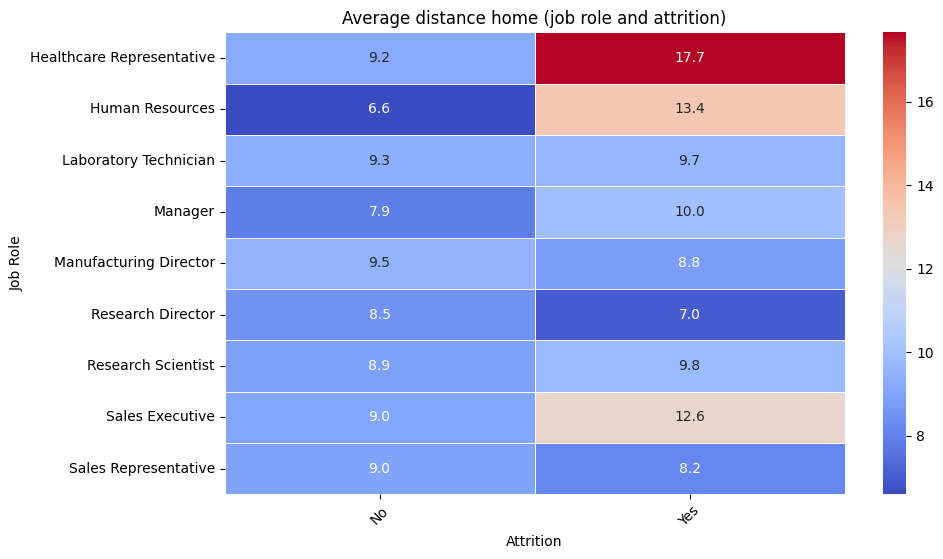

Attrition                   No   Yes
JobRole                             
Healthcare Representative  9.2  17.7
Human Resources            6.6  13.4
Sales Executive            9.0  12.6
Manager                    7.9  10.0
Research Scientist         8.9   9.8
Laboratory Technician      9.3   9.7
Manufacturing Director     9.5   8.8
Sales Representative       9.0   8.2
Research Director          8.5   7.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create pivot table
pivot_table = df.pivot_table(values="DistanceFromHome", index="JobRole", columns="Attrition", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)


plt.title("Average distance home (job role and attrition)")
plt.xlabel("Attrition")
plt.ylabel("Job Role")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()

# Cross-tabulation
cross_tab_1 = pd.crosstab(df["JobRole"], df["Attrition"], values=df["DistanceFromHome"], aggfunc="mean").round(1)
# cross_tab_1 = cross_tab_1.sort_values(by=0, ascending=False)
# cross_tab_1 = cross_tab_1.sort_values(by=1, ascending=False)
if "Yes" in cross_tab_1.columns and "No" in cross_tab_1.columns:
    cross_tab_1 = cross_tab_1.sort_values(by=["Yes", "No"], ascending=[False, False])
elif "Yes" in cross_tab_1.columns:
    cross_tab_1 = cross_tab_1.sort_values(by="Yes", ascending=False)
elif "No" in cross_tab_1.columns:
    cross_tab_1 = cross_tab_1.sort_values(by="No", ascending=False)
print(cross_tab_1)



$\quad \LARGE \text{Long commutes may increase attrition, especially in Healthcare, HR, and Sales roles, leadership roles (e.g., Research Directors, Manufacturing Directors) show reduced attrition even at modest distances,  which could be attributed to improved job satisfaction or remote work flexibility.}$

###**Average monthly income (education level and attrition)**

In [ ]:
'''
Higher profits, lower attrition?
Low salary, increased attrition?
'''

'\nHigher profits, lower attrition?\nLow salary, increased attrition?\n'

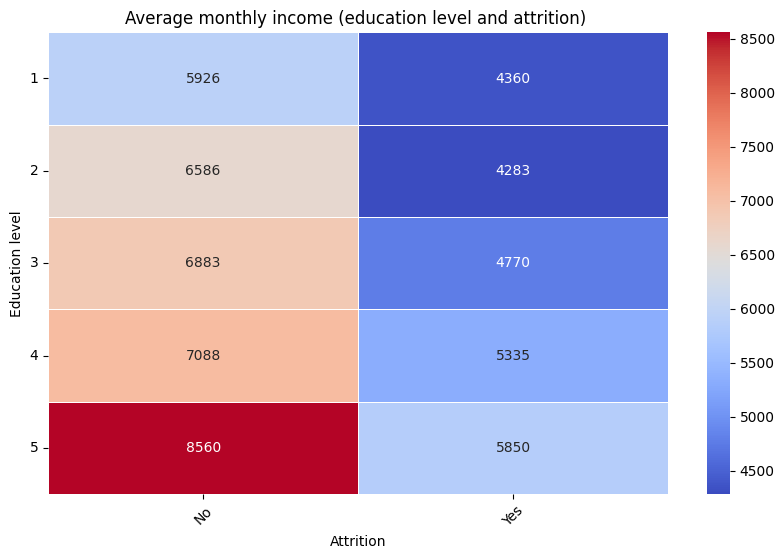

Attrition      No     Yes
Education                
5          8559.9  5850.2
4          7087.8  5335.2
3          6882.9  4770.2
1          5926.1  4360.2
2          6586.1  4282.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table for MonthlyIncome by Education and Attrition
pivot_table = df.pivot_table(values="MonthlyIncome", index="Education", columns="Attrition", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5)

# Labels
plt.title("Average monthly income (education level and attrition) ")
plt.xlabel("Attrition")
plt.ylabel("Education level")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()


# Cross-tabulation
pivot_table = df.pivot_table(values="MonthlyIncome", index="Education", columns="Attrition", aggfunc="mean").round(1)
# pivot_table = pivot_table.sort_values(by=0, ascending=False)
# pivot_table = pivot_table.sort_values(by=1, ascending=False)
if "Yes" in pivot_table.columns and "No" in pivot_table.columns:
    pivot_table = pivot_table.sort_values(by=["Yes", "No"], ascending=[False, False])
elif "Yes" in pivot_table.columns:
    pivot_table = pivot_table.sort_values(by="Yes", ascending=False)
elif "No" in pivot_table.columns:
    pivot_table = pivot_table.sort_values(by="No", ascending=False)
print(pivot_table)



$\quad \LARGE \text{Those who leave earn less than those who stay, with Master’s degree holders earning more than those with lower education levels}$

##**Correlation Heatmap for Single Men**

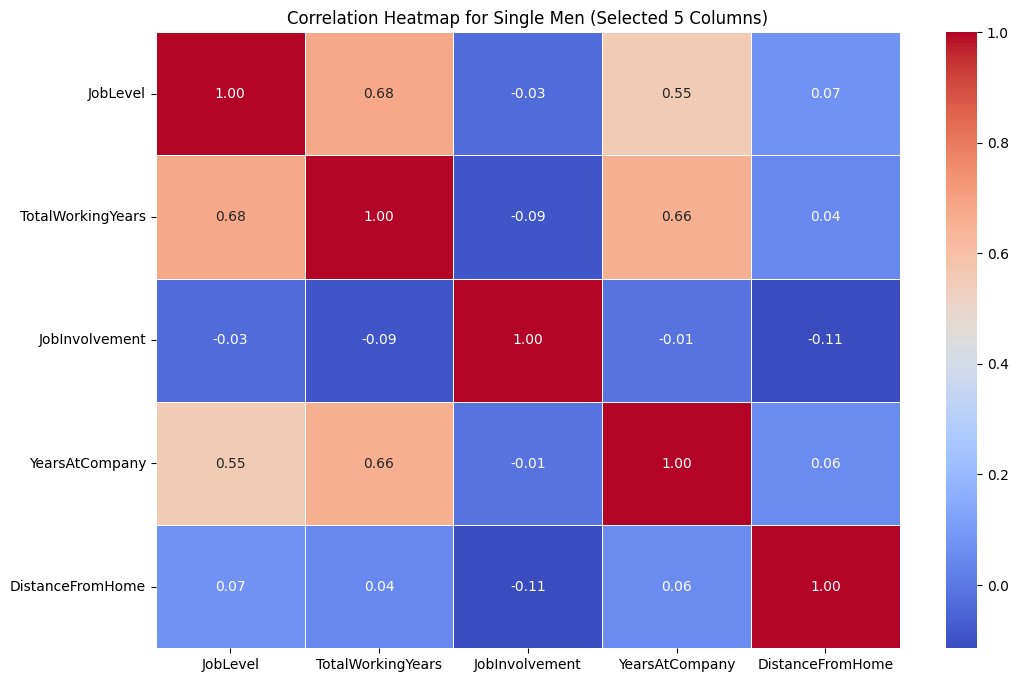

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

single_men = data[(data['Gender'] == 'Male') & (data['MaritalStatus'] == 'Single')]

numerical_data_single_men = single_men.select_dtypes(include=['number'])

columns_to_keep = ['JobLevel', 'TotalWorkingYears', 'JobInvolvement', 'YearsAtCompany', 'DistanceFromHome']

numerical_data_single_men_cleaned = numerical_data_single_men[columns_to_keep]

numerical_data_single_men_cleaned = numerical_data_single_men_cleaned.dropna(axis=1, how='all')

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data_single_men_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Single Men (Selected 5 Columns)')
plt.show()




$\quad \LARGE \text{The heatmap here is showing us correlation, we can see for example that JobLevel has a strong correlation with Total Working years ,which indicate that employee with higher level like managers typically have more year of experience and have spent more time in the job.}$

#Visualization

###**Average monthly income by education level**

<ipython-input-55-6c567664d191>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Education", y="MonthlyIncome", estimator="mean", palette="coolwarm")


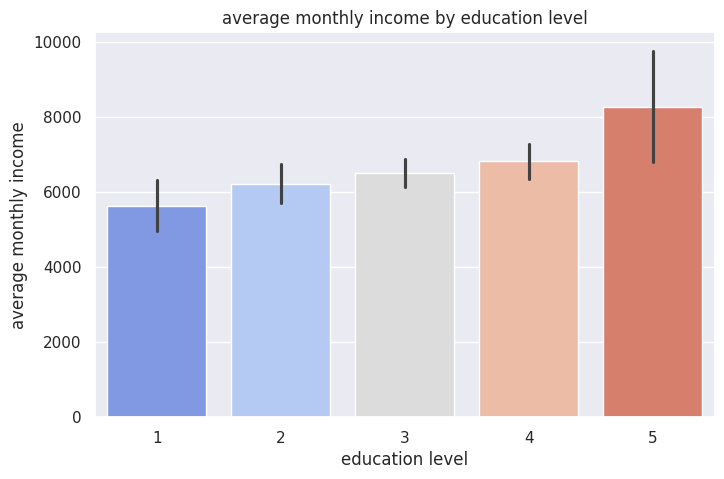

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")

# average income by education level
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Education", y="MonthlyIncome", estimator="mean", palette="coolwarm")
plt.title("average monthly income by education level")
plt.xlabel("education level")
plt.ylabel("average monthly income")
plt.show()


$\quad \LARGE \text{Employees with higher education levels tend to earn more}$
$\quad \LARGE \text{This suggests that higher education is associated with higher salaries, which is expected}$
$\quad \LARGE \text{Higher education correlates with higher salaries, implying that advanced education provides employees with better-paying opportunities}$

###**Salary distribution by job role**

<ipython-input-56-dbbbea48c1a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="MonthlyIncome", y="JobRole", palette="pastel")


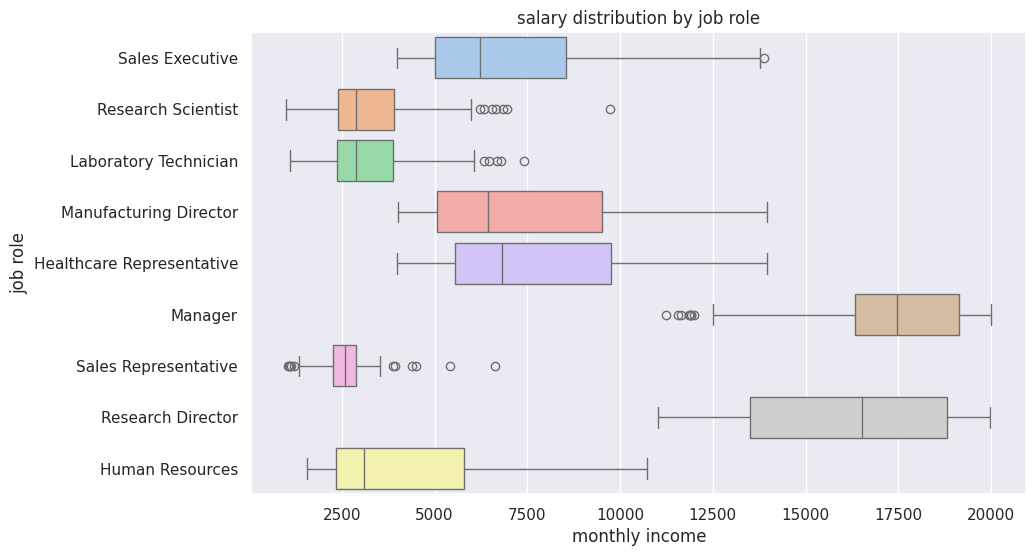

In [ ]:
# salary distribution by job roles
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="MonthlyIncome", y="JobRole", palette="pastel")
plt.title("salary distribution by job role")
plt.xlabel("monthly income")
plt.ylabel("job role")
plt.show()


 ### **Visualize the correlation**

<ipython-input-61-8cb9dc487715>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_married, y="Feature", x="Correlation", ax=axes[0], palette="coolwarm")
<ipython-input-61-8cb9dc487715>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_single, y="Feature", x="Correlation", ax=axes[1], palette="coolwarm")


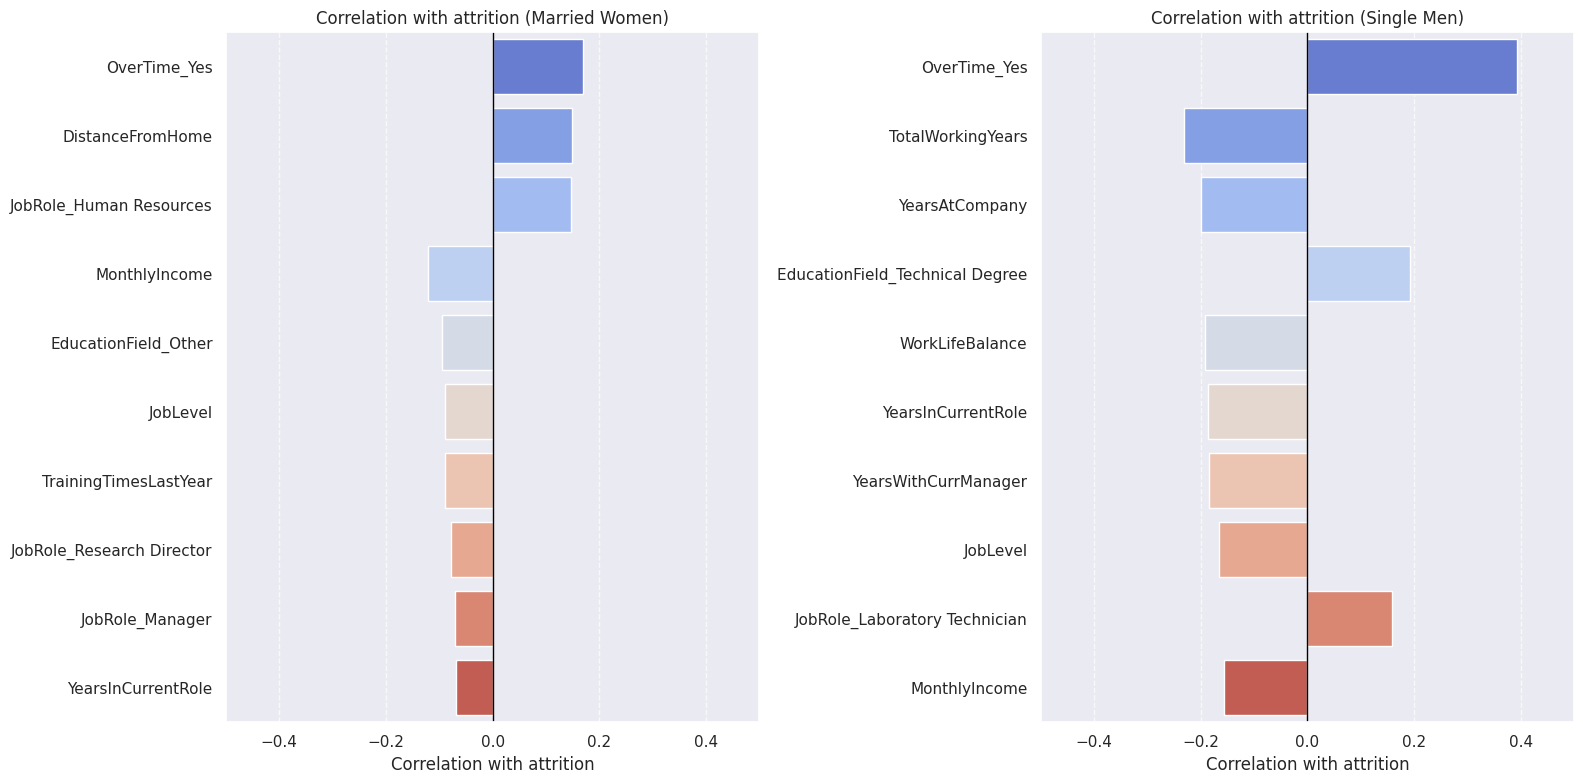

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# convert the data and fill
df_married = correlation_married_females.reset_index().rename(columns={'index': 'Feature', 'Attrition': 'Correlation'}).fillna(0)
df_single = correlation_single_males.reset_index().rename(columns={'index': 'Feature', 'Attrition': 'Correlation'}).fillna(0)

# no need in plot
df_married = df_married[df_married["Feature"] != "Attrition"]
df_single = df_single[df_single["Feature"] != "Attrition"]

# choose the top 10
df_married = df_married.reindex(df_married['Correlation'].abs().sort_values(ascending=False).index)[:10]
df_single = df_single.reindex(df_single['Correlation'].abs().sort_values(ascending=False).index)[:10]

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

# barplot
sns.barplot(data=df_married, y="Feature", x="Correlation", ax=axes[0], palette="coolwarm")
sns.barplot(data=df_single, y="Feature", x="Correlation", ax=axes[1], palette="coolwarm")

axes[0].set_title("Correlation with attrition (Married Women)")
axes[1].set_title("Correlation with attrition (Single Men)")

for ax in axes:
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel("Correlation with attrition")
    ax.set_ylabel("")
    ax.grid(axis="x", linestyle="--", alpha=0.7)
    ax.set_xlim(-0.5, 0.5)

plt.tight_layout()
plt.show()




# Retention Strategy Development

$\quad \LARGE \text{To reduce employee attrition, companies can improve work-life balance, provide targeted support for high-risk groups, increase employee engagement and growth opportunities, and leverage data for proactive decision-making.}\\[1cm]$
$\LARGE \text{These strategies include flexible work schedules, reducing excessive overtime, offering competitive salaries, assigning mentors, creating an inclusive work environment, investing in training programs, providing clear career progression paths, and encouraging job rotation.}\\[1cm]$
$ \LARGE \text{By leveraging data analytics, companies can identify patterns in attrition and implement preventive measures to maintain employee satisfaction and retention.}$